In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# pd.set_option("display.height", 500)
pd.set_option("display.max_rows", 500)

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/final_base.csv')

# Convert the column to numeric, forcing errors to NaN
df['OBJECTID_1'] = pd.to_numeric(df['OBJECTID_1'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=['OBJECTID_1'])

# Convert the column to integer type
df['OBJECTID_1'] = df['OBJECTID_1'].astype(int)

# Define the valid range
min_valid = 5293332
max_valid = 5419382

# Filter rows based on the integer range
df_filtered = df[(df['OBJECTID_1'] >= min_valid) & (df['OBJECTID_1'] <= max_valid)]

# Save the filtered dataframe to a new CSV file
df_filtered.to_csv('filtered_output.csv', index=False)

print(df.shape)
print(df_filtered.shape)

(121295, 54)
(121295, 54)


In [2]:
import pandas as pd
import geopandas as gpd

PATH_PARCELS = r"../data/extracted_parcels"
PATH_DU_EST = r"../data/parcels_cleanup.csv"


def get_parcels():
    parcels_df = gpd.read_file(PATH_PARCELS)
    return parcels_df


def get_du_est():
    du_df = pd.read_csv(PATH_DU_EST)
    return du_df

def add_columns_from_csv(gdf, csv):

    merged_csv_gdf = gdf.merge(csv[['REID', 'designation', 'housing_type', 'du_est_final','students2324','students2223','students2122','students2021', 'geo_id_b2010', 'geo_id_b2020', 'geo_id_bg2010', 'geo_id_bg2020', 'sch_id_base1819_es', 'sch_id_base_es', 'sch_id_gt_es', 'sch_id_yr_es', 'sch_id_yr_optout_es', 'sch_id_zone', 'sch_id_base_hs', 'sch_id_gt_hs', 'sch_id_base1819_ms', 'sch_id_base_ms', 'sch_id_gt_ms', 'sch_id_yr_ms', 'pu_2122_833', 'pu_2324_848', 'geo_id_t2010' 'geo_id_t2020']],   
                    left_on='REID', right_on='REID', how='right')
    
    return merged_csv_gdf

NameError: name 'gdf' is not defined

In [11]:
import pandas as pd
import geopandas as gpd

def main():
    # Load the parcels data
    parcels_df = get_parcels()
    
    # Load the du_est data
    du_df = get_du_est()

    parcels_df['REID'] = parcels_df['REID'].astype(str)
    du_df['REID'] = du_df['REID'].astype(str)
    
    # Merge the dataframes
    merged_gdf = add_columns_from_csv(parcels_df, du_df)
    
    return merged_gdf

if __name__ == "__main__":
    merged_gdf = main()
    # Print or save the merged GeoDataFrame as needed
    print(merged_gdf.head())

/tmp/ipykernel_1877/2639376891.py:14: DtypeWarning: Columns (17,18,19,21,39,40,64,82,92) have mixed types. Specify dtype option on import or set low_memory=False.
  du_df = pd.read_csv(PATH_DU_EST)


   OBJECTID_1  FEATURE_KE  PARCEL_TYP    REID  PARCEL_PK  AUT_SNAPSH  \
0       78584       78587           0  100000        1.0  2022-01-02   
1       18719       18719           0  100001        2.0  2022-01-02   
2       18271       18271           0  100002        3.0  2022-01-02   
3       18958       18958           0  100003        4.0  2022-01-02   
4       17297       17297           0  100004        5.0  2023-07-11   

          PIN PIN_EXT PIN_MAP PIN_BLOCK  ... IS_PENDING GROSS_LEAS PLAT_BOOK  \
0  0822419440     000    0822        41  ...          N        0.0    000000   
1  0822537639     000    0822        53  ...          N        0.0    00005A   
2  0822537634     000    0822        53  ...          N        0.0    00005A   
3  0822537539     000    0822        53  ...          N        0.0    00005A   
4  0822537534     000    0822        53  ...          N        0.0    00005A   

  PLAT_PAGE PHOTO_PATH  PHOTO_DATE  \
0    000000       None  1899-12-30   
1    00004

In [1]:
import zipfile
import os

def unzip_parcels(zip_file_path, extract_to_path):
    """
    Unzips the given zip file to the specified directory.

    Parameters:
    zip_file_path (str): The path to the zip file.
    extract_to_path (str): The directory where the contents will be extracted.
    """
    # Ensure the extraction directory exists
    if not os.path.exists(extract_to_path):
        os.makedirs(extract_to_path)
    
    # Open the zip file and extract its contents
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print(f'Extracted {zip_file_path} to {extract_to_path}')

# Example usage
zip_file_path = '../data/ParcelsNEW.zip'  # Path to your zip file
extract_to_path = '../data/extracted_parcels'  # Directory where you want to extract the files

unzip_parcels(zip_file_path, extract_to_path)

Extracted ../data/ParcelsNEW.zip to ../data/extracted_parcels


In [4]:
# Function to download parcels from Durham Open

import requests
import geopandas as gpd
from io import BytesIO
import zipfile

def download_durham_parcels(url):


    response = requests.get(url)
    response.raise_for_status()
   
    # Unzip the downloaded file
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        z.extractall("temp_dir")
   
    shapefile_path = [f for f in z.namelist() if f.endswith('.shp')][0]
   
    gdf = gpd.read_file(f"temp_dir/{shapefile_path}")
   
    return gdf






# Add columns from parcels_cleanup

def add_columns_from_csv(gdf, csv_path):
    df_csv = pd.read_csv(csv_path)

    gdf = gdf.merge(df_csv[['REID', 'designation', 'housing_type', 'du_est_parcels']],   
                    left_on='REID', right_on='REID', how='left')
    
    return gdf



/tmp/ipykernel_505/2286888691.py:25: DtypeWarning: Columns (18,19,20,22,40,41,47,65,83,85,93) have mixed types. Specify dtype option on import or set low_memory=False.
  parcels_df = pd.read_csv("../data/Parcels.csv")
/tmp/ipykernel_505/2286888691.py:17: DtypeWarning: Columns (17,18,19,21,39,40,64,82,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_path)


   Unnamed: 0  OBJECTID_1  OBJECTID  FEATURE_KE  PARCEL_TYP    REID  \
0           0     5293332     78584       78587           0  100000   
1           1     5293333     18719       18719           0  100001   
2           2     5293334     18271       18271           0  100002   
3           3     5293335     18958       18958           0  100003   
4           4     5293336     17297       17297           0  100004   

   PARCEL_PK  AUT_SNAPSH        PIN  PIN_EXT  ...  PLAT_BOOK  PLAT_PAGE  \
0          1  2021-12-20  822419440        0  ...     000000     000000   
1          2  2021-12-20  822537639        0  ...     00005A     000041   
2          3  2021-12-20  822537634        0  ...     00005A     000041   
3          4  2021-12-20  822537539        0  ...     00005A     000043   
4          5  2021-12-20  822537534        0  ...     00005A     000043   

   PHOTO_PATH PHOTO_DATE    Shape__Are   Shape__Len  \
0         NaN        NaN  4.241395e+06  8814.872258   
1         Na

In [2]:
parcels = gpd.read_file("../data/Parcels_1/Parcels_1.shp")
# parcels = gpd.read_file("../data/Durham_Tax_Parcels.gdb")
active_addresses = gpd.read_file("../data/ActiveAdresses.gdb")
parcels.head()

,OBJECTID_1,OBJECTID,FEATURE_KE,PARCEL_TYP,REID,PARCEL_PK,AUT_SNAPSH,PIN,PIN_EXT,PIN_MAP,...,MAP_ROD_DO,IS_PENDING,GROSS_LEAS,PLAT_BOOK,PLAT_PAGE,PHOTO_PATH,PHOTO_DATE,Shape__Are,Shape__Len,geometry
0,5293332,78584,78587,0,100000,1,2021-12-20,0822419440,000,0822,...,None,N,0,000000,000000,None,None,4.241395e+06,8814.872258,"MULTIPOLYGON (((-78.91250 36.00508, -78.91253 ..."
1,5293333,18719,18719,0,100001,2,2021-12-20,0822537639,000,0822,...,None,N,0,00005A,000041,None,None,6.934546e+03,376.739897,"POLYGON ((-78.91321 36.01309, -78.91320 36.013..."
2,5293334,18271,18271,0,100002,3,2021-12-20,0822537634,000,0822,...,None,N,0,00005A,000041,None,None,6.917429e+03,376.639565,"POLYGON ((-78.91274 36.01307, -78.91275 36.012..."
3,5293335,18958,18958,0,100003,4,2021-12-20,0822537539,000,0822,...,None,N,0,00005A,000043,None,None,6.927336e+03,377.025220,"POLYGON ((-78.91275 36.01293, -78.91276 36.012..."
4,5293336,17297,17297,0,100004,5,2021-12-20,0822537534,000,0822,...,None,N,0,00005A,000043,None,None,6.945440e+03,377.529386,"POLYGON ((-78.91276 36.01280, -78.91276 36.012..."


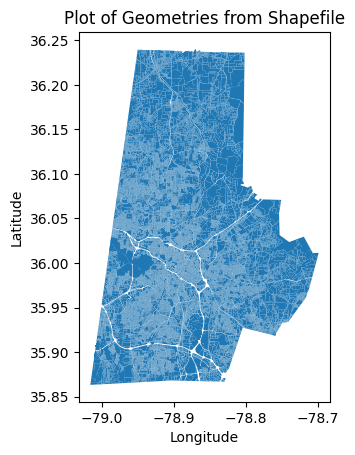

In [3]:
# Plot the GeoDataFrame
parcels.plot()
plt.title("Plot of Geometries from Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

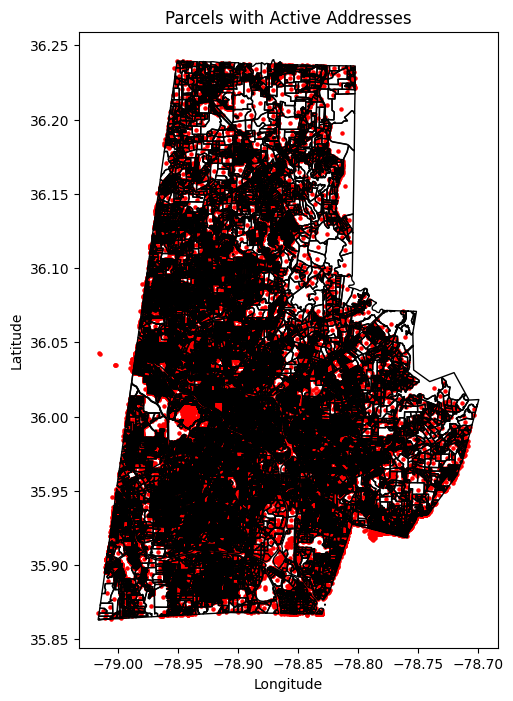

In [4]:
if parcels.crs != active_addresses.crs:
    active_addresses = active_addresses.to_crs(parcels.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(active_addresses, parcels, how="left", predicate="within")

# Plot the parcels and addresses
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
parcels.boundary.plot(ax=ax, linewidth=1, color="black")
active_addresses.plot(ax=ax, marker="o", color="red", markersize=5)
plt.title("Parcels with Active Addresses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Zoom in on a parcel with multiple adresses

In [5]:
# Filter the GeoDataFrames to include only the target parcel and its addresses
target_parcel = parcels.query("OBJECTID == 88397")
target_addresses = joined_gdf.query("OBJECTID == 88397")

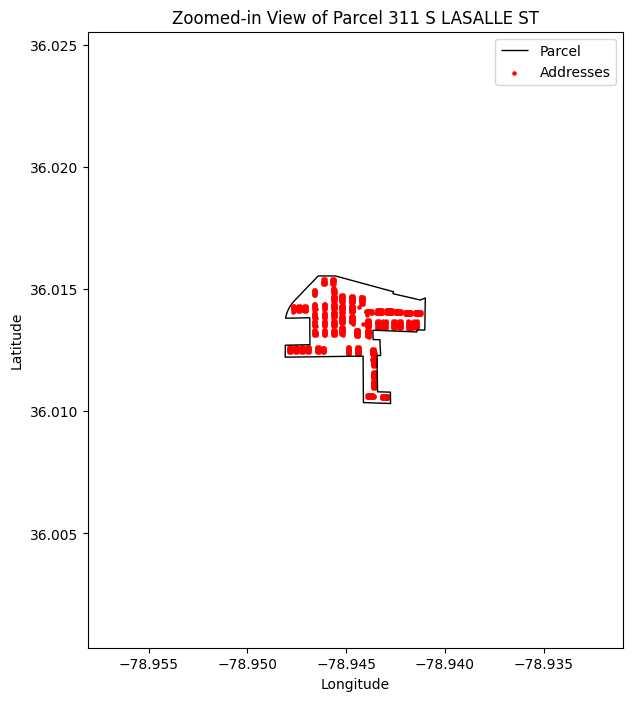

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

target_parcel.boundary.plot(ax=ax, linewidth=1, color="black", label="Parcel")
target_addresses.plot(ax=ax, marker="o", color="red", markersize=5, label="Addresses")

# Set plot title and labels
plt.title(f'Zoomed-in View of Parcel {target_parcel["LOCATION_A"].values[0]}')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Zoom in on the parcel by setting the axis limits to the parcel's bounds
parcel_bounds = target_parcel.total_bounds
ax.set_xlim(parcel_bounds[0] - 0.01, parcel_bounds[2] + 0.01)
ax.set_ylim(parcel_bounds[1] - 0.01, parcel_bounds[3] + 0.01)

plt.show()

## Adress counts by Parcel

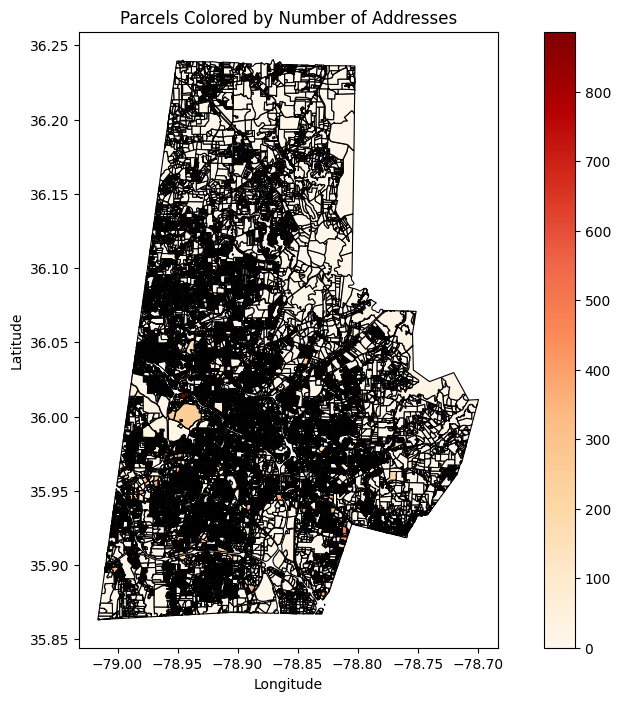

In [69]:
# Count the number of addresses per parcel
address_counts = (
    joined_gdf.groupby("index_right").size().reset_index(name="address_count")
)

# Merge the address counts back into the parcels GeoDataFrame
parcels_with_counts = parcels.join(address_counts.set_index("index_right"), how="left")

# Fill NaN values with 0 (parcels with no addresses)
parcels_with_counts["address_count"] = parcels_with_counts["address_count"].fillna(0)

# Plot the parcels colored by the number of addresses
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
parcels_with_counts.plot(
    column="address_count",
    ax=ax,
    legend=True,
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="black",
)
plt.title("Parcels Colored by Number of Addresses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [8]:
parcels_with_counts.to_csv("parcel_address_counts.csv")

In [12]:
import numpy as num

# Merge Dwelling Unit csv to parcels_res

ResParcelsDU = pd.read_csv("../data/ResParcelsDU.csv")
ResParcelsDU = ResParcelsDU.copy()
ResParcelsDU['REID'] = ResParcelsDU['REID'].astype(str)
parcels_with_counts = parcels_with_counts.copy()
parcels_with_counts['REID'] = parcels_with_counts['REID'].astype(str)

# Merge the address_count from parcels_with_counts into the merged_df
merged_with_counts_df = ResParcelsDU.merge(parcels_with_counts[['REID', 'address_count']], on='REID', how='left')

# Fill missing values in the address_count column with a suitable value, e.g., 0 or 'N/A'
merged_with_counts_df['address_count'] = merged_with_counts_df['address_count'].fillna(0)

merged_with_counts_df['DU_Est'] = pd.to_numeric(merged_with_counts_df['DU_Est'], errors='coerce')
merged_with_counts_df['address_count'] = pd.to_numeric(merged_with_counts_df['address_count'], errors='coerce')

# Calculate the absolute difference between DU_Est and address_count
merged_with_counts_df['abs_diff_DU_address'] = (merged_with_counts_df['DU_Est'] - merged_with_counts_df['address_count']).abs()

def determine_owner_occupancy(row):
    owner_mail = row['OWNER_MAIL']
    location_a = row['LOCATION_A']
    
    if pd.isna(owner_mail) or pd.isna(location_a):
        return "N"
    
    # Compare the stripped values
    return "Y" if owner_mail.strip() == location_a.strip() else "N"

# Apply the function to each row in the DataFrame
merged_with_counts_df['owner_occupied'] = merged_with_counts_df.apply(determine_owner_occupancy, axis=1)

#merged_with_counts_df.to_csv("ResParcels_DU_addresscounts.csv")


/tmp/ipykernel_5267/1770621591.py:5: DtypeWarning: Columns (19,22,37,40,41,47,65,83,85,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  ResParcelsDU = pd.read_csv("../data/ResParcelsDU.csv")


In [19]:
from geopandas import GeoDataFrame

# Define the list of land classes w/ apartments
exclude_land_classes = [
    'COM/APT-DWG CON', 'COM/ APT-GARDEN', 'COM/ APT-GARDEN S42',
    'COM/APT-HIGH RI', 'RES/ CONDOMINIUM', 'UNK-LEASEHOLD/CONDO',
    'COM/ DWNTWN ROW-ATTA', 'COM/ DWNTWN ROW-DETA', 'COM/ HISTORICAL',
    'COM/LIVIN ACCOMN S42'
]

# Create a new DataFrame by filtering out the apartment land classes
merged_df_no_apts = merged_with_counts_df[~merged_with_counts_df['LAND_CLASS'].isin(exclude_land_classes)]

#gdf = GeoDataFrame(merged_df_no_apts, crs="EPSG:4326", geometry = merged_df_no_apts['geometry'].tolist())

#gdf.to_file('parcels_no_apts.gdb')

print(merged_df_no_apts['geometry'].tolist())




TypeError: Input must be valid geometry objects: POLYGON ((-78.9132081457845 36.0130892026143, -78.9131999836701 36.0132270718473, -78.9127338006036 36.0132085269752, -78.9127415569382 36.0130711784148, -78.9132081457845 36.0130892026143))

In [ ]:
df = pd.read_csv('ParcelsRESnoAPTS.csv')

In [6]:
parcels_with_counts_subset = parcels_with_counts[
    [
        "OBJECTID",
        "LOCATION_A",
        "LAND_CLASS",
        "ACREAGE",
        "PHYADDR_ZI",
        "TOTAL_LAND",
        "TOTAL_BLDG",
        "LAND_USE_V",
        "TOTAL_PROP",
        "COST_TOTAL",
        "NEIGHBORHO",
        "Shape__Are",
        "Shape__Len",
        "geometry",
        "address_count",
    ]
]

In [7]:
parcels_with_counts_subset.loc[:, "average_prop_value"] = (
    parcels_with_counts_subset["TOTAL_PROP"]
    / parcels_with_counts_subset["address_count"]
).round()

/Users/dhavalpotdar/.pyenv/versions/3.10.0/envs/dps/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [8]:
parcels_with_counts_subset

,OBJECTID,LOCATION_A,LAND_CLASS,ACREAGE,PHYADDR_ZI,TOTAL_LAND,TOTAL_BLDG,LAND_USE_V,TOTAL_PROP,COST_TOTAL,NEIGHBORHO,Shape__Are,Shape__Len,geometry,address_count,average_prop_value
0.0,78584,1500 W MAIN ST,CMNTY SVC/ COLLEGE,97.24,27705,29471700.0,0.0,29471700.0,29471700.0,29471700.0,W PETTIGREW ST,4.241395e+06,8814.872258,"MULTIPOLYGON (((-78.91250 36.00508, -78.91253 ...",50.0,589434.0
1.0,18719,922 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,45120.0,115900.0,161020.0,161020.0,WALL TOWN,6.934546e+03,376.739897,"POLYGON ((-78.91321 36.01309, -78.91320 36.013...",3.0,53673.0
2.0,18271,920 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,64657.0,115900.0,180557.0,180557.0,WALL TOWN,6.917429e+03,376.639565,"POLYGON ((-78.91274 36.01307, -78.91275 36.012...",3.0,60186.0
3.0,18958,918 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,51287.0,115900.0,167187.0,167187.0,WALL TOWN,6.927336e+03,377.025220,"POLYGON ((-78.91275 36.01293, -78.91276 36.012...",3.0,55729.0
4.0,17297,916 LANCASTER ST,RES/ 1-FAMILY,0.16,27701,115900.0,554155.0,115900.0,670055.0,670055.0,WALL TOWN,6.945440e+03,377.529386,"POLYGON ((-78.91276 36.01280, -78.91276 36.012...",3.0,223352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126046.0,248178,4023 GLENN RD,VAC AG/ W/ NON-LVG I,2.01,27704,NaN,NaN,NaN,NaN,NaN,ABERDEEN AND GLENN,8.749025e+04,1297.343444,"POLYGON ((-78.83762 36.04911, -78.83755 36.048...",2.0,NaN
126047.0,248176,4007 GLENN RD,RES/ 1-FAMILY,2.00,27704,NaN,NaN,NaN,NaN,NaN,ABERDEEN AND GLENN,8.716895e+04,1304.765588,"POLYGON ((-78.83770 36.04797, -78.83806 36.047...",2.0,NaN
126048.0,248177,0 NO ADDRESS,VACANT LAND (UNDIFF),2.01,27704,NaN,NaN,NaN,NaN,NaN,"85 NORTH, COUNTY LINE",8.755738e+04,1309.155699,"POLYGON ((-78.83738 36.04840, -78.83756 36.048...",2.0,NaN
126049.0,248182,908 FISKE ST,RES/ 1-FAMILY,0.13,27703,NaN,NaN,NaN,NaN,NaN,OLD EAST DURHAM,5.710344e+03,320.711177,"POLYGON ((-78.87379 35.99509, -78.87393 35.995...",1.0,NaN


### Filter Land Classes

In [9]:
landclasses = gpd.read_file("../data/parcels_land_use_main.csv")

parcels_unique = pd.Series(parcels["LAND_CLASS"].unique())
parcels_unique_list = parcels_unique.tolist()
vitaly_unique = pd.Series(landclasses["landuse_desc"].unique())
vitaly_unique_list = vitaly_unique.tolist()

# Find land classes present in both
LC_intersection = [lc for lc in parcels_unique_list if lc in vitaly_unique_list]
parcels_only_LC = [lc for lc in parcels_unique_list if lc not in vitaly_unique_list]

LC_int_res = []
for lc in LC_intersection:
    housing_type_value = landclasses[landclasses["landuse_desc"] == lc][
        "housing_type"
    ].values
    if len(housing_type_value) > 0 and housing_type_value[0] != "non-res":
        LC_int_res.append(lc)

LC_int_non_res = [lc for lc in LC_intersection if lc not in LC_int_res]

# Print the resulting lists
print(LC_int_res)  # Confirmed Residential Land Classes from Vitaly
print(len(LC_int_res))
print(LC_int_non_res)  # Confirmed Non-Residential Land Classes from Vitaly
print(len(LC_int_non_res))
print(parcels_only_LC)  # Land Classes Unique to Parcels Data
print(len(parcels_only_LC))

# Land Classes Checked Individually:
additional_land_classes = [
    "COM/APT-DWG CON",
    "COM/ APT-GARDEN",
    "RES/TWNH W/ LAND",
    "COM/ CONVERTED RESID",
    "COM/ DWNTWN ROW-ATTA",
    "COM/ DWNTWN ROW-DETA",
    "COM/ APT-GARDEN S42",
    "COM/APT-HIGH RI",
    "CMNTY SVC/DCLT LD&I",
    "RES/ PATIO HOME W/ L",
    "COM/LIVIN ACCOMN S42",
    "RES/ RURAL RESIDENTI",
    "COM/ MOBILE HOME PAR",
    "PRESENT-USE/AGRICULT",
    "RES/ RESIDENTIAL (UN",
    "RES/ 2-MH OR MH SITE",
    "VAC RES/ W/ LEASEHOL",
    "AG/ AGRICULTURAL (UN",
    "RES/TWNH W/ LND S4",
    "RES/ CONDO-PUD W/ LA",
    "UNK-LEASEHOLD/CONDO",
]

# Create a new list that is a copy of LC_int_res
res_LC = LC_int_res.copy()

# Append the new land classes to the new list
res_LC.extend(additional_land_classes)

print("res_LC:", res_LC)
print(len(res_LC))

['RES/ 2-FAMILY', 'RES/ 1-FAMILY', "RES/ MULTIPLE DWG'S", 'RES/ HISTORICAL', 'RES/ CONDOMINIUM', 'RES/ 3-FAMILY', 'RES/ 4-FAMILY', 'CMNTY SVC/ WELFARE', 'COM/ HISTORICAL', 'RES/ 2-FAMILY S42', 'RES/ MOBILE HOME', 'RES/ 1-FAMILY S42', 'RES/ 1-MH OR MH SITE', 'RES/ DWG + 1-MBL HM', 'RES/ ESTATE', 'AG/ 1-FAMILY', 'AG/ YEAR-ROUND', 'RES/ DWG + 2-MBL HMS', "AG/ MULTIPLE DWG'S", 'AG/ 2-FAMILY', 'AG/ MOBILE HOME', 'AG/ OTHER LIVESTOCK', 'AG/ 1-MH OR MH SITE']
23
['CMNTY SVC/ COLLEGE', 'COM/ OFFICE BLDG', 'CMNTY SVC/ RELIGIOUS', 'CMNTY SVC/ CHURCH', 'VACANT COMMERCIAL', 'COM/ FAST FOOD', 'CMNTY SVC/ SCHOOL', 'COM/ RESTAURANTS', 'COM/ FUNERAL HOME', 'COM/ RETAIL SERVICES', 'VACANT LAND (UNDIFF)', 'COM/ VET CLINIC', 'COM/ W/ LEASEHOLD', 'VAC RES/ < 10 ACRES', 'PUBL SVC/ TELEPHONE', 'COM/ AUTO CAR WASH', 'VAC COM/ CONDO ASSOC', 'COM/ WHSE-STORAGE', 'COM/ AUTO BODY-TIRE', 'COM/ AREA SHOP CTRS', 'COM/ DINERS & LUNCH', 'COM/ HOTEL', 'COM/ MISC SERVICES', 'REC/ PARKS', 'COM/ BANK W/ OFFICE', 'COM/ OF

In [10]:
parcels_with_counts_subset.head()

,OBJECTID,LOCATION_A,LAND_CLASS,ACREAGE,PHYADDR_ZI,TOTAL_LAND,TOTAL_BLDG,LAND_USE_V,TOTAL_PROP,COST_TOTAL,NEIGHBORHO,Shape__Are,Shape__Len,geometry,address_count,average_prop_value
0.0,78584,1500 W MAIN ST,CMNTY SVC/ COLLEGE,97.24,27705,29471700.0,0.0,29471700.0,29471700.0,29471700.0,W PETTIGREW ST,4.241395e+06,8814.872258,"MULTIPOLYGON (((-78.91250 36.00508, -78.91253 ...",50.0,589434.0
1.0,18719,922 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,45120.0,115900.0,161020.0,161020.0,WALL TOWN,6.934546e+03,376.739897,"POLYGON ((-78.91321 36.01309, -78.91320 36.013...",3.0,53673.0
2.0,18271,920 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,64657.0,115900.0,180557.0,180557.0,WALL TOWN,6.917429e+03,376.639565,"POLYGON ((-78.91274 36.01307, -78.91275 36.012...",3.0,60186.0
3.0,18958,918 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,51287.0,115900.0,167187.0,167187.0,WALL TOWN,6.927336e+03,377.025220,"POLYGON ((-78.91275 36.01293, -78.91276 36.012...",3.0,55729.0
4.0,17297,916 LANCASTER ST,RES/ 1-FAMILY,0.16,27701,115900.0,554155.0,115900.0,670055.0,670055.0,WALL TOWN,6.945440e+03,377.529386,"POLYGON ((-78.91276 36.01280, -78.91276 36.012...",3.0,223352.0


In [11]:
parcels_with_counts_subset_filtered = parcels_with_counts_subset.query(
    "LAND_CLASS in @res_LC"
)

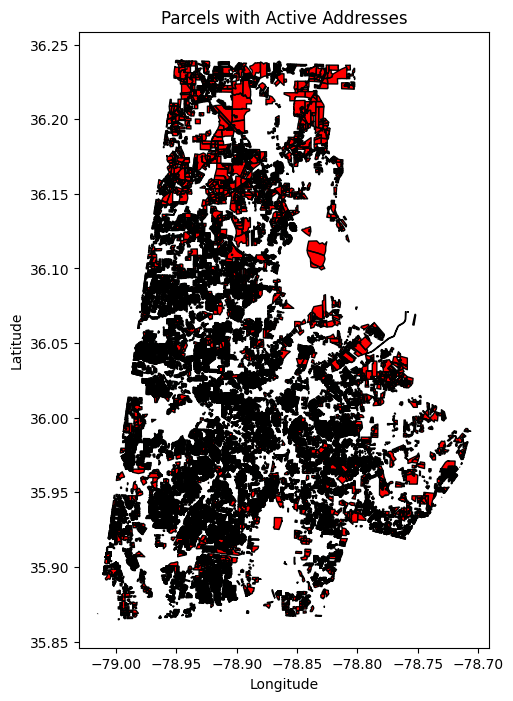

In [12]:
# Plot the parcels and addresses
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
parcels_with_counts_subset_filtered.boundary.plot(ax=ax, linewidth=1, color="black")
parcels_with_counts_subset_filtered.plot(ax=ax, marker="o", color="red", markersize=5)
plt.title("Parcels with Active Addresses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [13]:
parcels_with_counts_subset_filtered.head()

,OBJECTID,LOCATION_A,LAND_CLASS,ACREAGE,PHYADDR_ZI,TOTAL_LAND,TOTAL_BLDG,LAND_USE_V,TOTAL_PROP,COST_TOTAL,NEIGHBORHO,Shape__Are,Shape__Len,geometry,address_count,average_prop_value
1.0,18719,922 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,45120.0,115900.0,161020.0,161020.0,WALL TOWN,6934.545654,376.739897,"POLYGON ((-78.91321 36.01309, -78.91320 36.013...",3.0,53673.0
2.0,18271,920 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,64657.0,115900.0,180557.0,180557.0,WALL TOWN,6917.428711,376.639565,"POLYGON ((-78.91274 36.01307, -78.91275 36.012...",3.0,60186.0
3.0,18958,918 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,51287.0,115900.0,167187.0,167187.0,WALL TOWN,6927.335693,377.025220,"POLYGON ((-78.91275 36.01293, -78.91276 36.012...",3.0,55729.0
4.0,17297,916 LANCASTER ST,RES/ 1-FAMILY,0.16,27701,115900.0,554155.0,115900.0,670055.0,670055.0,WALL TOWN,6945.439941,377.529386,"POLYGON ((-78.91276 36.01280, -78.91276 36.012...",3.0,223352.0
5.0,38469,914 LANCASTER ST,RES/ 2-FAMILY,0.16,27701,115900.0,44769.0,115900.0,160669.0,160669.0,WALL TOWN,6946.748291,377.784721,"POLYGON ((-78.91276 36.01266, -78.91277 36.012...",3.0,53556.0


In [14]:
# parcels_with_counts_subset_filtered.to_file("../data/outputs/ParcelsFinal.gdb")

# parcels_with_counts_subset_filtered.drop(
#     columns=["Shape__Are", "Shape__Len", "geometry"]
# ).query("address_count > 0").sort_values(by="address_count", ascending=False).to_excel(
#     "../data/outputs/residential_parcels.xlsx", index=None
# )

### Join parcels to Census Tracts

In [8]:
df = pd.read_csv('../data/ParcelsRESnoAPTS.csv')

from geopandas import GeoDataFrame 

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
df = df.drop(['Longitude', 'Latitude'], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

#gdf.to_file('parcels_no_apts.gdb')

gdf.head()

/tmp/ipykernel_38923/3363744171.py:1: DtypeWarning: Columns (20,23,41,42,66,84,86,94,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ParcelsRESnoAPTS.csv')


,Unnamed: 0.1,Unnamed: 0,OBJECTID_1,OBJECTID,FEATURE_KE,PARCEL_TYP,REID,PARCEL_PK,AUT_SNAPSH,PIN,...,ValuationB,DU_Est,Inc_DU_Est,SpecialEst,District,POINT_X,POINT_Y,address_count,abs_diff_DU_address,owner_occupied
0,0,0,5293333,18719,18719,0,100001,2,2021-12-20,822537639,...,,2.0,,,Engine 02,-8784551.751,4302430.804,3.0,1.0,N
1,1,1,5293334,18271,18271,0,100002,3,2021-12-20,822537634,...,,2.0,,,Engine 02,-8784552.599,4302411.896,3.0,1.0,N
2,2,2,5293335,18958,18958,0,100003,4,2021-12-20,822537539,...,,2.0,,,Engine 02,-8784553.450,4302393.016,3.0,1.0,N
3,3,3,5293336,17297,17297,0,100004,5,2021-12-20,822537534,...,,1.0,,,Engine 02,-8784554.303,4302374.128,3.0,2.0,Y
4,4,4,5293337,38469,38469,0,100005,6,2021-12-20,822537439,...,,2.0,,,Engine 02,-8784555.154,4302355.236,3.0,1.0,N


In [23]:
census_tract = gpd.read_file(
    "../data/census_data/census_tract/acs1822_t_subset.shp"
).rename(
    columns={"GEOID_1": "GEOID", "e___182": "rent_estimate", "m___182": "rent_moe"}
)
census_tract.head()

,GEOID,rent_estimate,rent_moe,geometry
0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
1,37063002025,814.0,240.0,"POLYGON ((-78.92508 35.94166, -78.92274 35.943..."
2,37063001505,1866.0,333.0,"POLYGON ((-78.94803 36.01418, -78.94707 36.015..."
3,37063001711,1984.0,365.0,"POLYGON ((-78.94294 36.06243, -78.93855 36.064..."
4,37063001400,855.0,347.0,"POLYGON ((-78.89458 35.97182, -78.89333 35.975..."


In [34]:
# Set the coordinate reference system (CRS) for the parcels GeoDataFrame
parcels_with_counts_subset_filtered.set_crs(epsg=4326, inplace=True)

if parcels_with_counts_subset_filtered.crs != census_tract.crs:
    census_tract = census_tract.to_crs(parcels_with_counts_subset_filtered.crs)

joined_gdf = gpd.sjoin(
    parcels_with_counts_subset_filtered, census_tract, how="right", predicate="within"
)

# View the result
joined_gdf.head()

/Users/dhavalpotdar/.pyenv/versions/3.10.0/envs/dps/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,index_left,OBJECTID,LOCATION_A,LAND_CLASS,ACREAGE,PHYADDR_ZI,TOTAL_LAND,TOTAL_BLDG,LAND_USE_V,TOTAL_PROP,COST_TOTAL,NEIGHBORHO,Shape__Are,Shape__Len,address_count,average_prop_value,GEOID,rent_estimate,rent_moe,geometry
0,2732.0,97682.0,310 E MAIN ST,COM/ HISTORICAL,0.13,27701,169274.0,937009.0,169274.0,1106283.0,1106283.0,E. MAIN,5838.623291,333.464032,2.0,553142.0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
0,2727.0,97685.0,311 E MAIN ST,COM/ HISTORICAL,0.66,27701,838791.0,371076.0,838791.0,1209867.0,1209867.0,E. MAIN,28965.480225,1015.751884,1.0,1209867.0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
0,102905.0,3801.0,506 GAR C N MANGUM ST,RES/ CONDOMINIUM,0.00,27701,0.0,11996.0,0.0,11996.0,11996.0,MANGUM 506,22292.094482,622.462171,26.0,461.0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
0,102904.0,3800.0,506 GAR B N MANGUM ST,RES/ CONDOMINIUM,0.00,27701,0.0,11996.0,0.0,11996.0,11996.0,MANGUM 506,22292.094482,622.462171,26.0,461.0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."
0,102887.0,3783.0,506 406 N MANGUM ST,RES/ CONDOMINIUM,0.00,27701,0.0,219332.0,0.0,219332.0,219332.0,MANGUM 506,22292.094482,622.462171,26.0,8436.0,37063002200,1209.0,202.0,"POLYGON ((-78.91253 36.00297, -78.91249 36.003..."


In [36]:
joined_gdf.to_file("../data/outputs/ParcelsFinal2.gdb")

/var/folders/9w/31krdsjd3x32k5n1vk0_fxd40000gn/T/ipykernel_24604/1602650325.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  joined_gdf.to_file("../data/outputs/ParcelsFinal2.gdb")
